**Import packages:**

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras import optimizers
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

**Data preparation:**

shape X train :  (60000, 28, 28, 1)
shape X test :  (10000, 28, 28, 1)
shape Y train :  (60000, 10)
shape Y test :  (10000, 10)


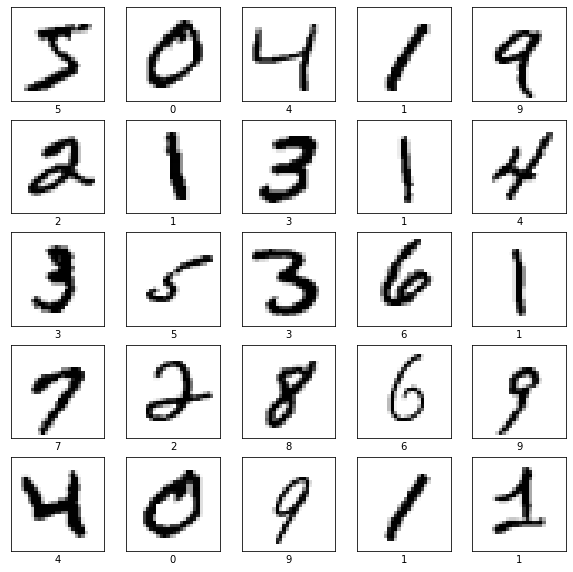

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']

# Display a few images and their labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
#plt.show()

# number of samples considered:
n_train = 60000
n_test = 10000

# Normalisation 
X_train = X_train[0:n_train,:].astype('float32') / 255.
X_test = X_test[0:n_test,:].astype('float32') / 255.
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

Y_train = to_categorical(y_train[0:n_train], 10)
Y_test = to_categorical(y_test[0:n_test], 10)

print('shape X train : ', X_train.shape)
print('shape X test : ', X_test.shape)
print('shape Y train : ', Y_train.shape)
print('shape Y test : ', Y_test.shape)

In [6]:
# To generate noisy images :
noise = np.random.normal(loc=0, scale=0.8, size=X_train.shape)
x_train_noisy = X_train + noise
noise = np.random.normal(loc=0, scale=0.8, size=X_test.shape)
x_test_noisy = X_test + noise
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

**Model Construction:**

**Question 7 :**

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3212288   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

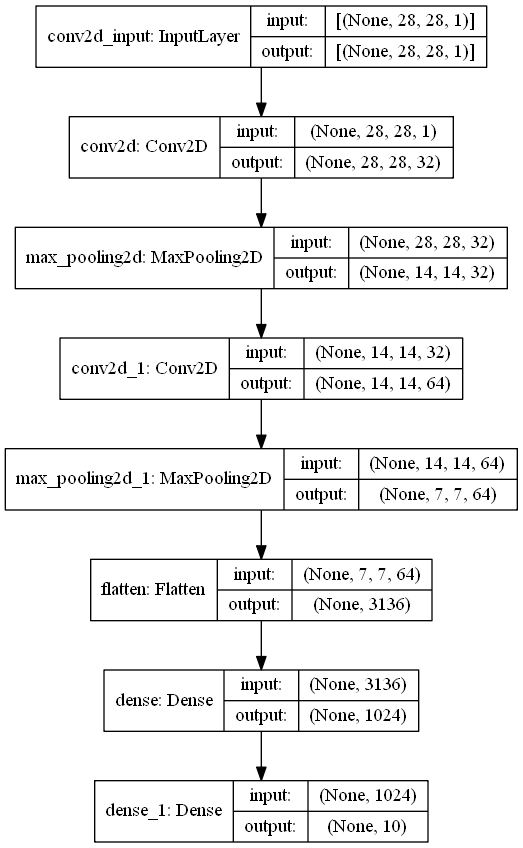

In [7]:
model = Sequential()

#couche de convolution avec activation reLU. 32 convolutions 5 × 5 (stride de 1 × 1)
model.add(Conv2D(32, (5, 5), padding ='same' , strides=(1,1) , input_shape=(28, 28, 1), activation='relu'))

# couche de max pooling 2 × 2 (stride de 2 × 2)
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#couche de convolution avec activation reLU. 64 convolutions 5 × 5 (stride de 1 × 1)
model.add(Conv2D(64, (5, 5), padding ='same' , strides=(1,1) , input_shape=(28, 28, 1), activation='relu'))

# couche de max pooling 2 × 2 (stride de 2 × 2)
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten(input_shape=(7,7)))

# couche complètement connectée de 1024 neurones (activation reLU)
model.add(Dense(units=1024,activation='relu' ))

#couche de sortie
model.add(Dense(units=10, activation='softmax'))

#TODO Complete here!
print(model.summary())
plot_model(model, show_shapes = True, to_file='MLP_model.png')

**Question 8 :**

Nombre de paramètres :
    
    (28-2) * 32 =  832
    
    + ((5*5*32)+1) * 64   =  52 096
    
    + (3136+1) * 1024 = 3 264 384
    
    + (1024+1) * 10 = 3 274 634
    
    Le +1 correspondant au biais
    

**Training The Model:**

In [8]:
# TODO complete the function compile here:
#model.compile(...)
lr = 0.01
model.compile(loss= "categorical_crossentropy"  , optimizer= optimizers.Adam(lr)  , metrics=['accuracy'])
# Training using validation set
n_epoch = 4
n_batch = 1000
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test),  epochs=n_epoch, batch_size=n_batch, verbose = 1)

model.save('./')

Epoch 1/4
60/60 [==============================] - 47s 763ms/step - loss: 0.8555 - accuracy: 0.7618 - val_loss: 0.1041 - val_accuracy: 0.9653
Epoch 2/4
60/60 [==============================] - 44s 729ms/step - loss: 0.0787 - accuracy: 0.9756 - val_loss: 0.0601 - val_accuracy: 0.9803
Epoch 3/4
60/60 [==============================] - 39s 653ms/step - loss: 0.0512 - accuracy: 0.9840 - val_loss: 0.0546 - val_accuracy: 0.9829
Epoch 4/4
60/60 [==============================] - 41s 680ms/step - loss: 0.0373 - accuracy: 0.9881 - val_loss: 0.0384 - val_accuracy: 0.9876
INFO:tensorflow:Assets written to: ./assets


**Performances:**

In [9]:
# Evaluate performances on the training set
mesures_perf_train = model.evaluate(X_train, Y_train)
print('resultats train : ', mesures_perf_train)

# Evaluate performances on the test set
mesures_perf_test = model.evaluate(x_test_noisy, Y_test)
print('resultats test : ', mesures_perf_test)


1875/1875 [==============================] - 15s 8ms/step - loss: 0.0307 - accuracy: 0.9904
resultats train :  [0.030688483268022537, 0.9903666377067566]
313/313 [==============================] - 3s 8ms/step - loss: 2.1117 - accuracy: 0.3770
resultats test :  [2.111699104309082, 0.37700000405311584]


**Predictions:**

In [10]:
predictions = model.predict(X_test)

**Visualization:**

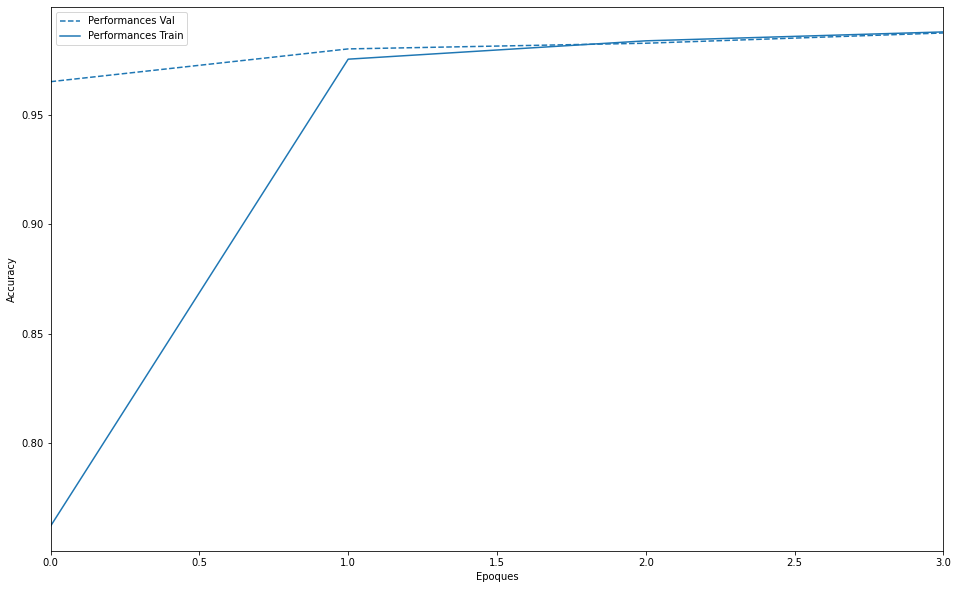

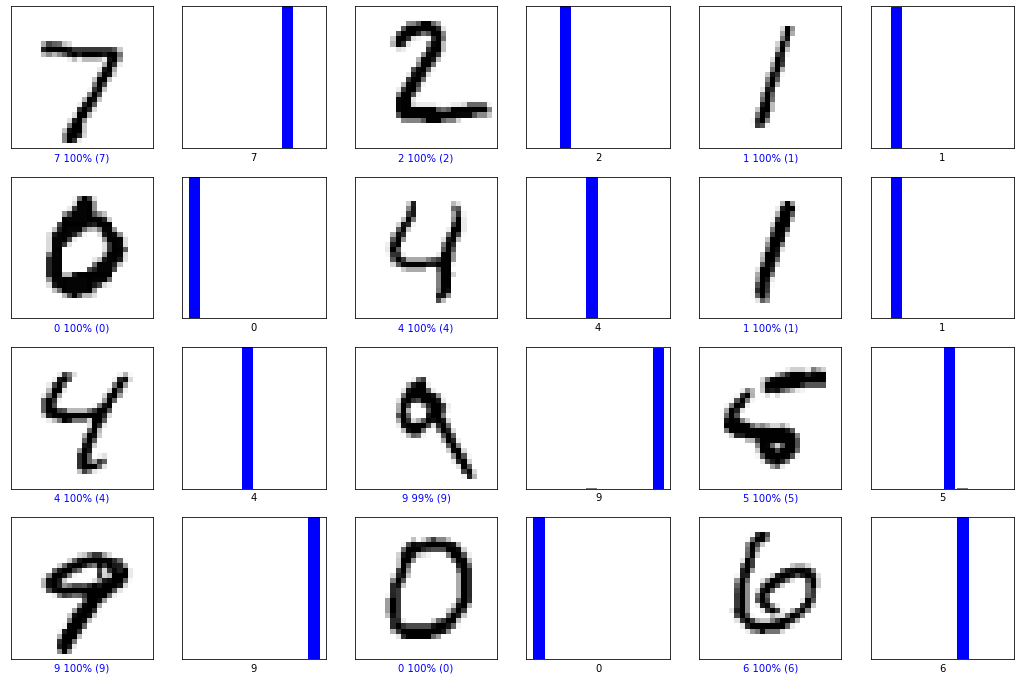

In [11]:
# Plot history
def plot_history(histories, key='accuracy'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')
  plt.xlabel('Epoques')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()
  plt.xlim([0,max(history.epoch)])


plot_history([('performances', history)],
               key='accuracy')
plt.show()

# display example results
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])  

  plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


pred_labels = np.argmax(predictions, axis=1)
idx_errors = np.where(pred_labels!=y_test[0:n_test])
plt.figure(figsize=(18,12))
K=0
for i in range(12): #change to: for i in idx_errors[0][0:12]: to get example errors   
    plt.subplot(4,6,2*K+1)
    plot_image(i, predictions, y_test, X_test)
    plt.subplot(4,6,2*K+2)
    plot_value_array(i, predictions,  y_test)
    plt.xlabel(class_names[y_test[i]])
    K=K+1
plt.show()


**Question 9 :**
    
    Nous obtenons une très bonne performance, quasiment 100%

**Question 10 :**

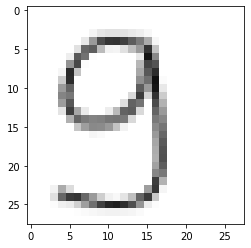

In [14]:
import cv2
#source : https://stackoverflow.com/questions/54519303/keras-mnist-test-own-images-bad-prediction

model = load_model('./') #on charge le modèle sauvegardé

list1 = []
    
for i in range(10) :
    

    y=cv2.imread("Images/"+ str(i) +"bis.png")   #nos images perso
    y1=cv2.resize(y,(28,28))                
    plt.imshow(y1)

    temp = cv2.cvtColor(y1,cv2.IMREAD_GRAYSCALE)  #on passe en niveaux de gris
    temp=255-temp                                
    plt.imshow(temp)

    Y = np.zeros((temp.shape[0], temp.shape[1],1), dtype=float)   
    Y[:,:,0] = temp[:, :,0].astype(float) / 255           
    yh= model.predict(Y.reshape(1,28,28,1))       
    yh
    list1.append(yh.argmax())


In [15]:
for i in range(10):
    print(list1[i])

3
1
2
3
4
5
9
7
8
3


In [16]:
cmpt = 0
for i in range(10):
    if(int(list1[i])==int(i)):
        cmpt+=1
print("nous avons ",cmpt,"bonnes valeurs sur 10, soit :",cmpt*10,'%')

nous avons  7 bonnes valeurs sur 10, soit : 70 %
